In [14]:
# --- Librerías para manipulación de datos y numéricas ---
import pandas as pd
import numpy as np

# --- Librerías para visualización ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Módulos de Scikit-Learn para Machine Learning ---
# Para dividir los datos
from sklearn.model_selection import train_test_split
# Para preprocesar los datos (escalar y codificar)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Métricas para evaluar los modelos
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, f1_score, classification_report

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


In [15]:
# URL del dataset German Credit Data en el repositorio de UCI
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'

# Los nombres de las columnas se definen según la documentación del dataset
column_names = [
    'existing_checking_account', 'duration_in_month', 'credit_history', 'purpose',
    'credit_amount', 'savings_account_bonds', 'present_employment_since',
    'installment_rate_in_percentage_of_disposable_income',
    'personal_status_and_sex', 'other_debtors_guarantors', 'present_residence_since',
    'property', 'age_in_years', 'other_installment_plans', 'housing',
    'number_of_existing_credits_at_this_bank', 'job', 'number_of_people_being_liable_to_provide_maintenance_for',
    'telephone', 'foreign_worker', 'class'
]

# Leemos los datos. El archivo original no tiene cabecera y usa espacios como separadores.
df = pd.read_csv(url, sep=' ', header=None, names=column_names)

# La columna 'class' es nuestro objetivo (la que queremos predecir).
# Originalmente, 1 = Buen riesgo y 2 = Mal riesgo.
# Lo cambiamos para que sea más estándar en ML:
# 0 = Buen riesgo (clase negativa)
# 1 = Mal riesgo (clase positiva, la que nos interesa detectar)
df['class'] = df['class'].map({1: 0, 2: 1})

# Mostramos las primeras 5 filas para verificar que se cargó bien
print("--- Primeras 5 filas del dataset ---")
display(df.head())

# Vemos cuántos casos hay de cada clase. ¡Es un dataset desbalanceado!
print("\n--- Distribución de la clase objetivo ---")
print(df['class'].value_counts())

--- Primeras 5 filas del dataset ---


,existing_checking_account,duration_in_month,credit_history,purpose,credit_amount,savings_account_bonds,present_employment_since,installment_rate_in_percentage_of_disposable_income,personal_status_and_sex,other_debtors_guarantors,...,property,age_in_years,other_installment_plans,housing,number_of_existing_credits_at_this_bank,job,number_of_people_being_liable_to_provide_maintenance_for,telephone,foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1



--- Distribución de la clase objetivo ---
class
0    700
1    300
Name: count, dtype: int64


In [16]:
# 1. Separar las características (X) de la variable objetivo (y)
X = df.drop('class', axis=1)
y = df['class']

# 2. Identificar qué columnas son numéricas y cuáles son categóricas
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# 3. Crear el "preprocesador"
# Es un objeto que sabe qué hacer con cada tipo de columna
preprocessor = ColumnTransformer(
    transformers=[
        # Al tuple ('num', ...) le decimos: aplica StandardScaler a las columnas numéricas
        ('num', StandardScaler(), numerical_features),
        # Al tuple ('cat', ...) le decimos: aplica OneHotEncoder a las columnas categóricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 4. Dividir los datos en entrenamiento (70%) y prueba (30%)
# random_state=42 asegura que la división sea siempre la misma (reproducibilidad)
# stratify=y mantiene la misma proporción de buenos/malos en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Datos listos y divididos.")
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

Datos listos y divididos.
Tamaño del conjunto de entrenamiento: 700 muestras
Tamaño del conjunto de prueba: 300 muestras


--- Resultados para: Regresión Logística ---
Balanced Accuracy: 0.7119
F1 Score: 0.5963

Reporte de Clasificación:
              precision    recall  f1-score   support

 Buen Riesgo       0.82      0.89      0.85       210
  Mal Riesgo       0.68      0.53      0.60        90

    accuracy                           0.78       300
   macro avg       0.75      0.71      0.72       300
weighted avg       0.77      0.78      0.78       300



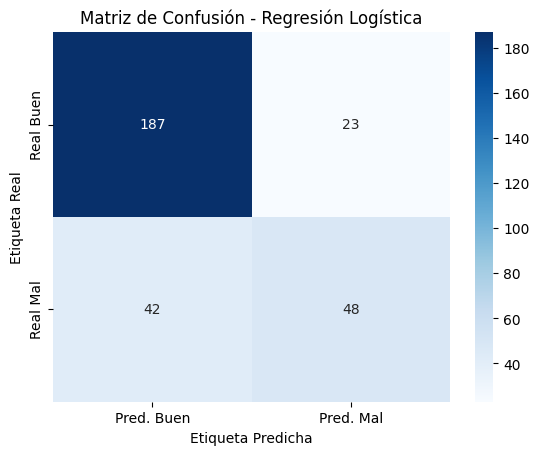

--------------------------------------------------

--- Resultados para: Árbol de Decisión ---
Balanced Accuracy: 0.5937
F1 Score: 0.4348

Reporte de Clasificación:
              precision    recall  f1-score   support

 Buen Riesgo       0.76      0.74      0.75       210
  Mal Riesgo       0.43      0.44      0.43        90

    accuracy                           0.65       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.66      0.65      0.66       300



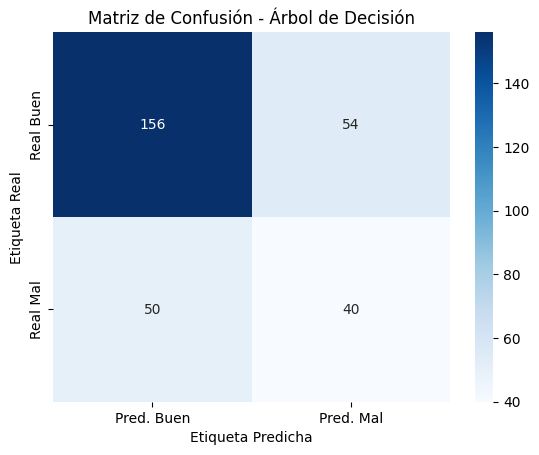

--------------------------------------------------

--- Resultados para: Random Forest ---
Balanced Accuracy: 0.6341
F1 Score: 0.4526

Reporte de Clasificación:
              precision    recall  f1-score   support

 Buen Riesgo       0.77      0.92      0.84       210
  Mal Riesgo       0.66      0.34      0.45        90

    accuracy                           0.75       300
   macro avg       0.71      0.63      0.65       300
weighted avg       0.73      0.75      0.72       300



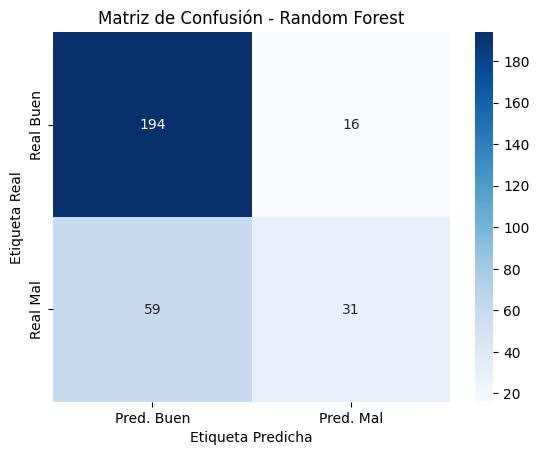

--------------------------------------------------

--- Resultados para: SVC ---
Balanced Accuracy: 0.6722
F1 Score: 0.5248

Reporte de Clasificación:
              precision    recall  f1-score   support

 Buen Riesgo       0.79      0.93      0.85       210
  Mal Riesgo       0.73      0.41      0.52        90

    accuracy                           0.78       300
   macro avg       0.76      0.67      0.69       300
weighted avg       0.77      0.78      0.76       300



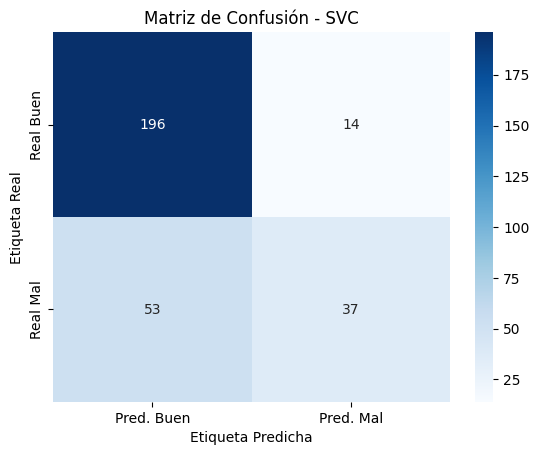

--------------------------------------------------



In [17]:
# Diccionario con los modelos que vamos a probar
models = {
    "Regresión Logística": LogisticRegression(random_state=42, max_iter=1000),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42)
}

# Diccionario para los pipelines ya entrenados
fitted_pipelines = {}

# Iteramos sobre cada modelo para entrenarlo y evaluarlo
for name, model in models.items():
    # Creamos un Pipeline: primero preprocesa los datos, luego aplica el modelo
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    # 1. Entrenar el pipeline con los datos de entrenamiento
    pipeline.fit(X_train, y_train)

    # Guardamos el pipeline completo y entrenado
    fitted_pipelines[name] = pipeline
    
    # 2. Hacer predicciones con los datos de prueba
    y_pred = pipeline.predict(X_test)
    
    # 3. Calcular y mostrar las métricas
    print(f"--- Resultados para: {name} ---")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred, target_names=['Buen Riesgo', 'Mal Riesgo']))
    
    # 4. Visualizar la Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Pred. Buen', 'Pred. Mal'], 
                yticklabels=['Real Buen', 'Real Mal'])
    plt.title(f'Matriz de Confusión - {name}')
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
    plt.show()
    print("-" * 50 + "\n")


Resultados para: Regresión Logística (Sensible al Coste)
Balanced Accuracy: 0.7095
F1 Score (clase 'Mal Riesgo'): 0.5954

Reporte de Clasificación:
              precision    recall  f1-score   support

 Buen Riesgo       0.91      0.55      0.69       210
  Mal Riesgo       0.45      0.87      0.60        90

    accuracy                           0.65       300
   macro avg       0.68      0.71      0.64       300
weighted avg       0.77      0.65      0.66       300



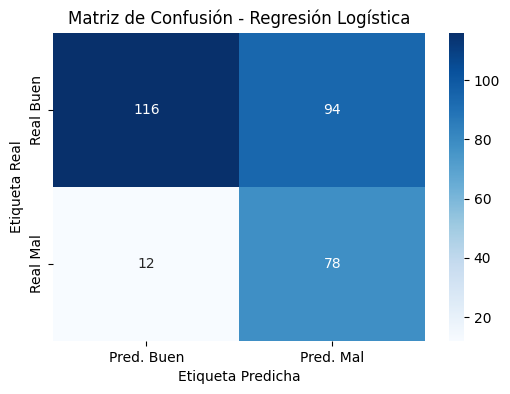


Resultados para: Árbol de Decisión (Sensible al Coste)
Balanced Accuracy: 0.5960
F1 Score (clase 'Mal Riesgo'): 0.4277

Reporte de Clasificación:
              precision    recall  f1-score   support

 Buen Riesgo       0.76      0.78      0.77       210
  Mal Riesgo       0.45      0.41      0.43        90

    accuracy                           0.67       300
   macro avg       0.60      0.60      0.60       300
weighted avg       0.66      0.67      0.67       300



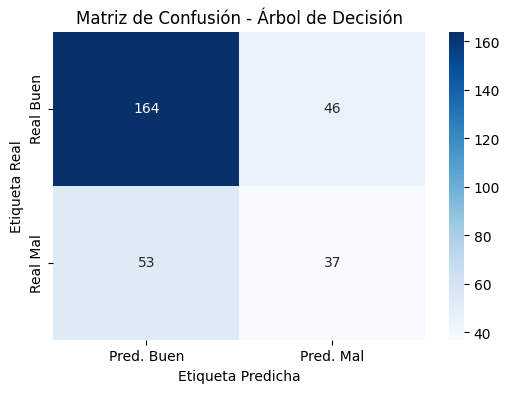


Resultados para: Random Forest (Sensible al Coste)
Balanced Accuracy: 0.6587
F1 Score (clase 'Mal Riesgo'): 0.5000

Reporte de Clasificación:
              precision    recall  f1-score   support

 Buen Riesgo       0.78      0.93      0.85       210
  Mal Riesgo       0.70      0.39      0.50        90

    accuracy                           0.77       300
   macro avg       0.74      0.66      0.67       300
weighted avg       0.76      0.77      0.74       300



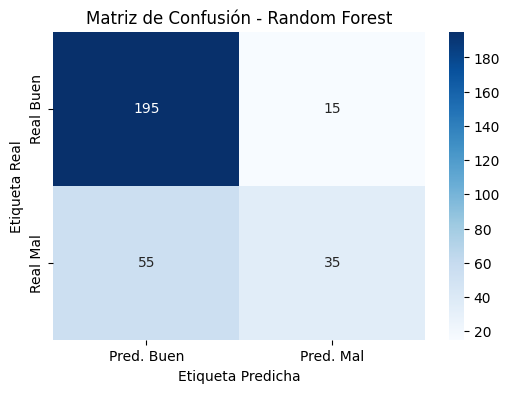


Resultados para: SVC (Sensible al Coste)
Balanced Accuracy: 0.7087
F1 Score (clase 'Mal Riesgo'): 0.5941

Reporte de Clasificación:
              precision    recall  f1-score   support

 Buen Riesgo       0.87      0.63      0.73       210
  Mal Riesgo       0.48      0.79      0.59        90

    accuracy                           0.68       300
   macro avg       0.68      0.71      0.66       300
weighted avg       0.75      0.68      0.69       300



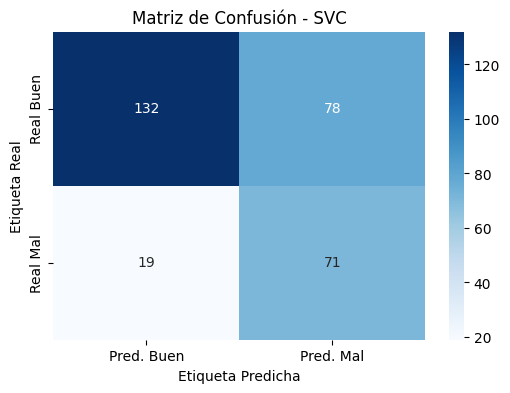

In [18]:
# 1. Definir los modelos a comparar con sus pesos de coste
# La clase minoritaria (1, Mal Riesgo) tiene un coste 5 veces mayor.
cost_weights = {0: 1, 1: 5}

models_to_evaluate = {
    'Regresión Logística': LogisticRegression(random_state=42, class_weight=cost_weights, max_iter=1000),
    'Árbol de Decisión': DecisionTreeClassifier(random_state=42, class_weight=cost_weights),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight=cost_weights),
    "SVC": SVC(random_state=42, class_weight=cost_weights)
}

# 2. Iterar sobre cada modelo para entrenar, predecir y evaluar
for model_name, model in models_to_evaluate.items():
    
    # Crear el pipeline específico para este modelo
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    # Entrenar el pipeline
    pipeline.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = pipeline.predict(X_test)
    
    # Calcular y mostrar las métricas
    print(f"\n{'='*60}")
    print(f"Resultados para: {model_name} (Sensible al Coste)")
    print(f"{'='*60}")
    
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score (clase 'Mal Riesgo'): {f1_score(y_test, y_pred):.4f}")
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred, target_names=['Buen Riesgo', 'Mal Riesgo']))

    # Visualizar la Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Pred. Buen', 'Pred. Mal'], 
                yticklabels=['Real Buen', 'Real Mal'])
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
    plt.show()

In [8]:
# Recopilamos los datos para la tabla final
summary_data = []

# Obtenemos el pipeline del Random Forest convencional
rf_pipeline = fitted_pipelines['Random Forest']

# Hacemos la predicción usando el pipeline completo
y_pred_rf = rf_pipeline.predict(X_test)

# Métricas del Random Forest convencional
rf_metrics = classification_report(y_test, y_pred_rf, output_dict=True)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
summary_data.append({
    "Modelo": "Random Forest Convencional",
    "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred_rf),
    "F1 Score (Mal Riesgo)": rf_metrics['1']['f1-score'],
    "Falsos Negativos (Costosos)": fn,
    "Falsos Positivos": fp
})


# Métricas del Random Forest Sensible al Coste
cs_metrics = classification_report(y_test, y_pred_cs, output_dict=True)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_cs).ravel()
summary_data.append({
    "Modelo": "Random Forest Sensible al Coste",
    "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred_cs),
    "F1 Score (Mal Riesgo)": cs_metrics['1']['f1-score'],
    "Falsos Negativos (Costosos)": fn,
    "Falsos Positivos": fp
})


# Creamos y mostramos el DataFrame con el resumen
summary_df = pd.DataFrame(summary_data)
print("--- Tabla Comparativa Final ---")
display(summary_df.set_index('Modelo'))

--- Tabla Comparativa Final ---


,Balanced Accuracy,F1 Score (Mal Riesgo),Falsos Negativos (Costosos),Falsos Positivos
Modelo,,,,
Random Forest Convencional,0.634127,0.452555,59,16
Random Forest Sensible al Coste,0.658730,0.500000,55,15
